In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set image dimensions and parameters
img_width, img_height = 255, 255
batch_size = 32
epochs = 10
num_classes = 10  # 10 dog breeds

main_dir=r"C:\Users\aajer\Downloads\archive (18)\dataset"
print(main_dir)

# Data Augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)



# Data Loaders
train_generator = datagen.flow_from_directory(
    main_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = datagen.flow_from_directory(
    main_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)
validation_generator=datagen.flow_from_directory(
    main_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)
images,labels=next(train_generator)
print(images.shape)

C:\Users\aajer\Downloads\archive (18)\dataset
Found 967 images belonging to 10 classes.
Found 775 images belonging to 10 classes.
Found 775 images belonging to 10 classes.
(32, 255, 255, 3)


In [19]:

# CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')  # 10 classes
])
  # Use 'softmax' for multiclass classification



model.summary()
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])






Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)                    │ (None, 253, 253, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 126, 126, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 124, 124, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,840,266 (56.61 MB)

 Trainable params: 14,840,266 (56.61 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

Epoch 1/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 29s 922ms/step - accuracy: 0.1074 - loss: 3.8451 - val_accuracy: 0.2018 - val_loss: 2.1409
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 123ms/step - accuracy: 0.2188 - loss: 2.1056 - val_accuracy: 0.2370 - val_loss: 2.1033
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 26s 856ms/step - accuracy: 0.2617 - loss: 2.0554 - val_accuracy: 0.7500 - val_loss: 1.0002
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 121ms/step - accuracy: 0.5312 - loss: 1.6830 - val_accuracy: 0.7865 - val_loss: 0.9541
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 25s 848ms/step - accuracy: 0.6991 - loss: 1.0296 - val_accuracy: 0.9805 - val_loss: 0.1433
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 123ms/step - accuracy: 0.8438 - loss: 0.4185 - val_accuracy: 0.9805 - val_loss: 0.1302
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 25s 842ms/step - accuracy: 0.9015 - loss: 0.3827 - val_accuracy: 0.9922 - val_loss: 0.0641
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 121ms/step - accuracy: 0.9375 - loss: 0.2329 - val_accuracy

In [27]:
print("Classes indices:", train_generator.class_indices)

def predict_image(filename):
    img = load_img(filename, target_size=(img_width, img_height))
    plt.imshow(img)
    plt.show()

    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    prediction = model.predict(img_array)
    predicted_probability = prediction[0, 0]
    class_idx = np.argmax(prediction)

    if class_idx == 0:
        print("Beagle")
    elif class_idx == 1:
        print("Bulldog")
    elif class_idx == 2:
        print("dalmatian")    
        
    elif class_idx == 3:
        print("Dachshund")
    elif class_idx == 4:
        print("German_shepherd")    
    elif class_idx == 5:
        print("Golden_Retriever")
    elif class_idx == 6:
        print("Labrador_Retriever")
    elif class_idx == 7:
        print("Poodle")
    elif class_idx == 8:
        print("Rottweiler")
    elif class_idx == 9:
        print("Yorkshire_Terrier")
    else:
        print("dogs")



Classes indices: {'Beagle': 0, 'Boxer': 1, 'Bulldog': 2, 'Dachshund': 3, 'German_Shepherd': 4, 'Golden_Retriever': 5, 'Labrador_Retriever': 6, 'Poodle': 7, 'Rottweiler': 8, 'Yorkshire_Terrier': 9}


In [22]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import numpy as np


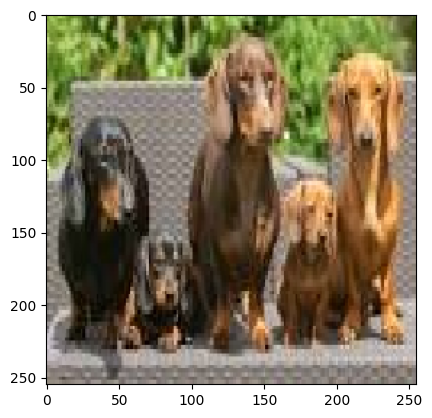

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Dachshund


In [28]:
predict_image(r"C:\Users\aajer\Downloads\archive (18)\dataset\Dachshund\Dachshund_51.jpg")

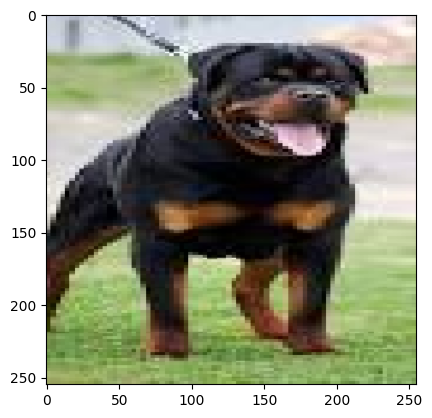

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Rottweiler


In [29]:
predict_image(r"C:\Users\aajer\Downloads\archive (18)\dataset\Rottweiler\Rottweiler_8.jpg")